In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [ ]:
# Some rows in weak_csv have text logged to it, so need to clean...


In [20]:
def plot_run_time(filename):
    df = pd.read_csv(filename, index_col=0,sep=' ')
    
    fig = plt.figure()
    ax = plt.gca()
    
    strong = "strong" in filename
    exp_type = "strong" if strong else "weak"
    
    df_group = df.groupby(df.index).mean()
    
    P = df_group.index.to_numpy().astype(np.int)
    time = df_group['time'].to_numpy().astype(np.float32)
    label = 'Run Time'
    ax.loglog(P, time, label=label)
    
    plt.legend()
    plt.title("run-time for" + " " + exp_type + " study")
    plt.xlabel("P")
    plt.ylabel("Avg. Run Time (s)")
    
    return ax

def plot_speedup(filename):
    df = pd.read_csv(filename, index_col=0,sep=' ')
    
    fig = plt.figure()
    ax = plt.gca()
    
    strong = "strong" in filename
    exp_type = "strong" if strong else "weak"
    
    df_group = df.groupby(df.index).mean()
    P = df_group.index.to_numpy().astype(np.int)
    plt.loglog(P, P*-1, label="ideal speedup", color="black",linestyle="--")
    
    time = df_group['time'].to_numpy().astype(np.float32)
    T_s = np.float32(df['time'].iloc[1])
    
    if strong:
        T_1 = T_s
    else:
        T_1 = np.sqrt(P) * T_s
    S_P = T_1 / P
    
    label = 'Time'
    
    ax.loglog(P, S_P, label=label)
    
    plt.legend()
    plt.title("speedup for" + " " + filename)
    plt.xlabel("P")
    plt.ylabel("S")
    
    return ax

In [28]:
plot_run_time("wave_time_strong.csv")

TypeError: plot_run_time() got an unexpected keyword argument 'index_col'

In [29]:
weak = pd.read_csv("wave_time_weak.csv",index_col=0,sep=' ')
weak

ParserError: Error tokenizing data. C error: Expected 4 fields in line 512, saw 10


In [27]:
weak.

AttributeError: 'DataFrame' object has no attribute 'n'

<AxesSubplot:title={'center':'speedup for wave_time_strong.csv'}, xlabel='P', ylabel='S'>

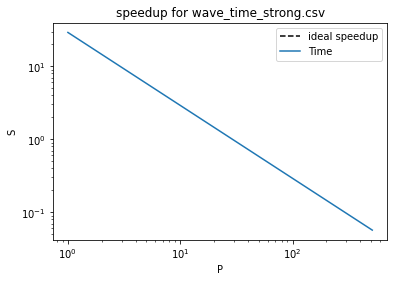

In [22]:
plot_speedup("wave_time_strong.csv")